### Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
from sklearn.model_selection import train_test_split

### Loading the dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

### Performing Univariate Analysis

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

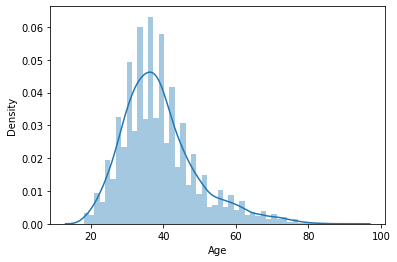

In [3]:
sb.distplot(df.Age)

### Performing Bivariate Analysis

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

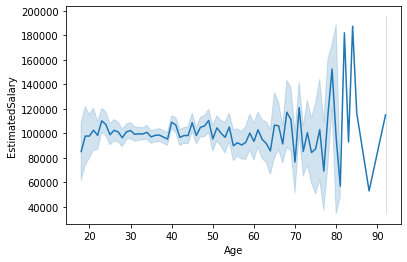

In [4]:
sb.lineplot(df.Age, df.EstimatedSalary)

### Performing Multi-variate Analysis

##### Using countplot

<AxesSubplot:xlabel='Geography', ylabel='count'>

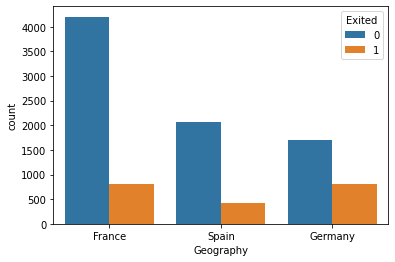

In [5]:
sb.countplot(data=df[['Geography', 'Exited']], x='Geography', hue='Exited')

##### Using pairplot

In [6]:
#sb.pairplot(df)

##### Using heatmap

<AxesSubplot:>

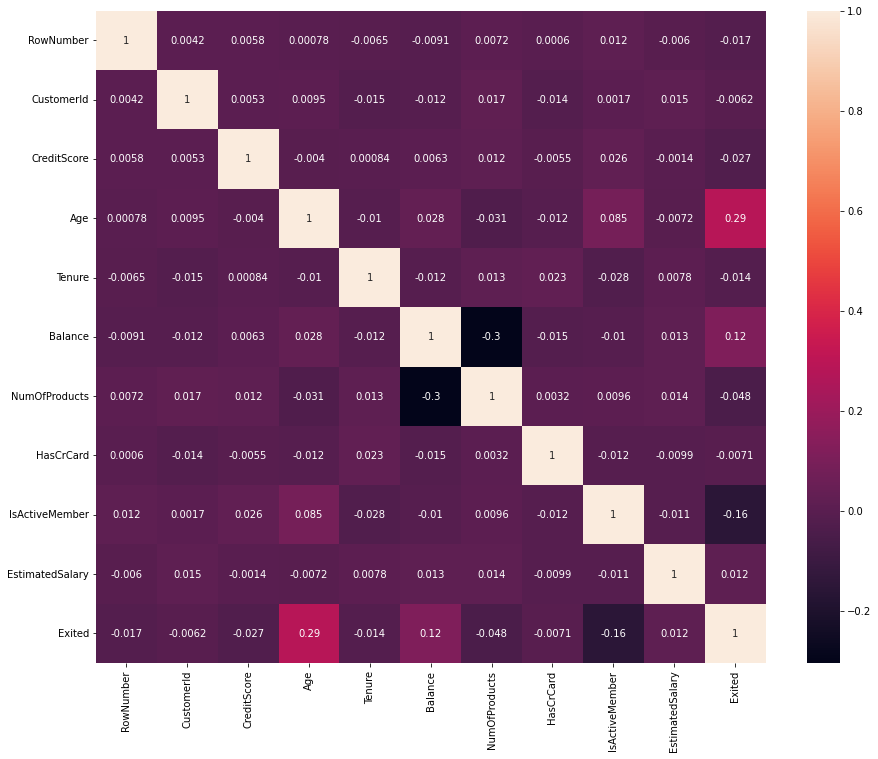

In [7]:
fig, ax = plt.subplots(figsize=(15,12))
sb.heatmap(df.corr(), annot=True, ax=ax)

### Performing Descriptive Statistics on the Dataset

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Handling Missing Values

In [9]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

#### There are no missing values in the dataset. So no replacement or filling in is needed

### Finding Outliers and Replacing the Outliers

#### Outlier Detection

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:>

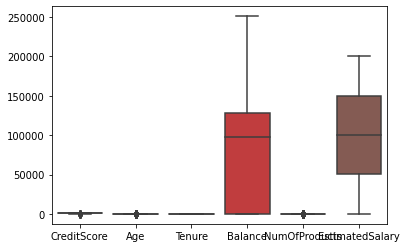

In [11]:
sb.boxplot(data=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

There are outliers in the columns 'CreditScore', 'Age' and 'NumOfProducts'. They have to be replaced separately.

##### Outliers Replacement in 'CreditScore' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

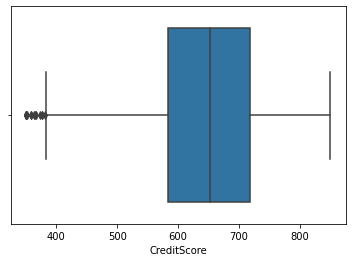

In [12]:
sb.boxplot(df.CreditScore)

In [13]:
Q1_CredScore = df.CreditScore.quantile(0.25)
Q3_CredScore = df.CreditScore.quantile(0.75)
IQR_CredScore = Q3_CredScore - Q1_CredScore
lower_limit_CredScore = Q1_CredScore - 1.5*IQR_CredScore
upper_limit_CredScore = Q3_CredScore + 1.5*IQR_CredScore

In [14]:
df['CreditScore'].median()

652.0

In [15]:
df['CreditScore'] = np.where(df['CreditScore'] < lower_limit_CredScore, 652, df['CreditScore'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

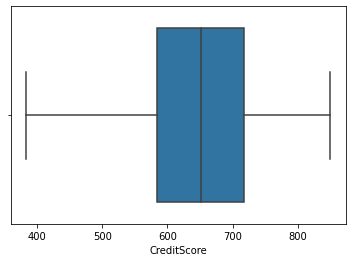

In [16]:
sb.boxplot(df.CreditScore)

In [17]:
df.shape

(10000, 14)

##### Outliers Replacement in 'Age' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

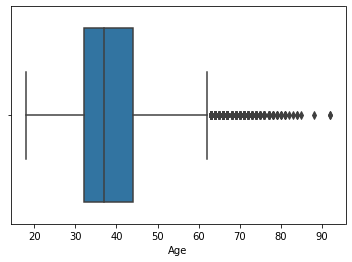

In [18]:
sb.boxplot(df.Age)

In [19]:
Q1_Age = df.Age.quantile(0.25)
Q3_Age = df.Age.quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_limit_Age = Q1_Age - 1.5*IQR_Age
upper_limit_Age = Q3_Age + 1.5*IQR_Age

In [20]:
df['Age'].median()

37.0

In [21]:
df['Age'] = np.where(df['Age'] > upper_limit_Age, 37, df['Age'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

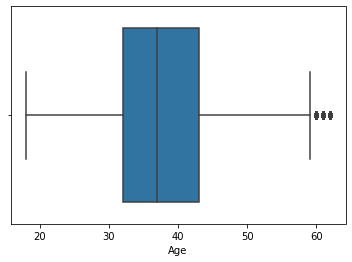

In [22]:
sb.boxplot(df.Age)

In [23]:
df.shape

(10000, 14)

##### Outliers Replacement in 'NumOfProducts' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts'>

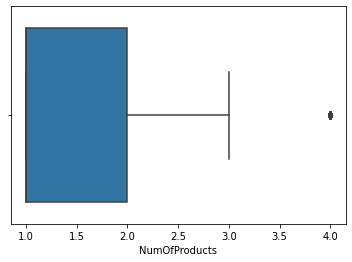

In [24]:
sb.boxplot(df.NumOfProducts)

In [25]:
Q1_NoP = df.NumOfProducts.quantile(0.25)
Q3_NoP = df.NumOfProducts.quantile(0.75)
IQR_NoP = Q3_NoP - Q1_NoP
lower_limit_NoP = Q1_NoP - 1.5*IQR_NoP
upper_limit_NoP = Q3_NoP + 1.5*IQR_NoP

In [26]:
df['NumOfProducts'].median()

1.0

In [27]:
df['NumOfProducts'] = np.where(df['NumOfProducts'] > upper_limit_NoP, 1, df['NumOfProducts'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts'>

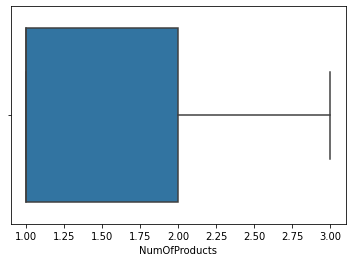

In [28]:
sb.boxplot(df.NumOfProducts)

In [29]:
df.shape

(10000, 14)